In [85]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [57]:
#Load the data set
#top 30 cyptocurrencies on yahoo api. columns represent stock prices on ADJ close. Load the CCI30 Index on Close
stock_prices = pd.read_csv('./Data/Yahoo_Stock_Prices.csv')
CCI30 = pd.read_csv('./Data/cci30_OHLCV.csv')

In [58]:
stock_prices.set_index('Date', inplace = True)
stock_prices

,AAVE-USD,ADA-USD,ALGO-USD,AMP1-USD,BCH-USD,BNB-USD,BTC-USD,CRO-USD,DOGE-USD,DOT1-USD,...,SOL1-USD,THETA-USD,TRX-USD,UNI3-USD,USDC-USD,USDT-USD,VET-USD,XLM-USD,XMR-USD,XRP-USD
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,417.460325,0.225117,0.477715,0.047612,536.977939,45.298979,314.248993,0.074266,0.000183,18.915649,...,8.740041,1.016259,0.031663,33.090125,1.004170,1.000792,0.021065,0.005493,0.465760,0.024390
2015-01-02,417.460325,0.225117,0.477715,0.047612,536.977939,45.298979,315.032013,0.074266,0.000186,18.915649,...,8.740041,1.016259,0.031663,33.090125,1.004170,1.000792,0.021065,0.005481,0.459137,0.024318
2015-01-03,417.460325,0.225117,0.477715,0.047612,536.977939,45.298979,281.082001,0.074266,0.000167,18.915649,...,8.740041,1.016259,0.031663,33.090125,1.004170,1.000792,0.021065,0.004672,0.461172,0.022106
2015-01-04,417.460325,0.225117,0.477715,0.047612,536.977939,45.298979,264.195007,0.074266,0.000158,18.915649,...,8.740041,1.016259,0.031663,33.090125,1.004170,1.000792,0.021065,0.004416,0.417234,0.018928
2015-01-05,417.460325,0.225117,0.477715,0.047612,536.977939,45.298979,274.473999,0.074266,0.000161,18.915649,...,8.740041,1.016259,0.031663,33.090125,1.004170,1.000792,0.021065,0.004947,0.421412,0.020316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-28,320.381165,1.511987,0.898697,0.036657,689.947876,329.879913,35697.605469,0.113855,0.311205,21.410093,...,29.039276,6.564076,0.072087,25.924946,1.000196,1.000481,0.108300,0.398792,262.820526,0.900148
2021-05-29,297.899628,1.406232,0.829413,0.033361,651.579956,305.052155,34616.066406,0.111285,0.303110,19.863375,...,27.376421,6.313582,0.068783,23.179464,0.999901,1.000392,0.098990,0.367157,242.684479,0.831788
2021-05-30,325.148407,1.577279,0.850180,0.037683,663.512024,325.784027,35678.128906,0.112185,0.302224,20.473988,...,28.602659,6.545633,0.072036,25.742519,0.999498,1.000063,0.107572,0.375688,262.333740,0.906609


In [59]:
#Set Index as Date and filter data to just include Closing price
CCI30.set_index('Date', inplace = True)
CCI30 = pd.DataFrame(CCI30['Close'])

In [60]:
stock_prices.mean()

AAVE-USD      417.460325
ADA-USD         0.225117
ALGO-USD        0.477715
AMP1-USD        0.047612
BCH-USD       536.977939
BNB-USD        45.298979
BTC-USD      7918.957640
CRO-USD         0.074266
DOGE-USD        0.011785
DOT1-USD       18.915649
EOS-USD         4.627645
ETC-USD        10.916023
ETH-USD       352.090670
FIL-USD        15.541560
HEX-USD         0.007625
ICP1-USD      131.643737
LINK-USD        5.892775
LTC-USD        58.369481
MATIC-USD       0.114451
SHIB-USD        0.000002
SOL1-USD        8.740041
THETA-USD       1.016259
TRX-USD         0.031663
UNI3-USD       33.090125
USDC-USD        1.004170
USDT-USD        1.000792
VET-USD         0.021065
XLM-USD         0.104724
XMR-USD        78.466877
XRP-USD         0.275894
dtype: float64

In [61]:
stock_prices.groupby(pd.to_datetime(stock_prices.index).year).mean()

,AAVE-USD,ADA-USD,ALGO-USD,AMP1-USD,BCH-USD,BNB-USD,BTC-USD,CRO-USD,DOGE-USD,DOT1-USD,...,SOL1-USD,THETA-USD,TRX-USD,UNI3-USD,USDC-USD,USDT-USD,VET-USD,XLM-USD,XMR-USD,XRP-USD
Date,,,,,,,,,,,,,,,,,,,,,
2015,417.460325,0.225117,0.477715,0.047612,536.977939,45.298979,272.453381,0.074266,0.000143,18.915649,...,8.740041,1.016259,0.031663,33.090125,1.004170,0.999115,0.021065,0.002801,0.490609,0.008864
2016,417.460325,0.225117,0.477715,0.047612,536.977939,45.298979,568.492407,0.074266,0.000235,18.915649,...,8.740041,1.016259,0.031663,33.090125,1.004170,0.999743,0.021065,0.001999,3.688392,0.006894
2017,417.460325,0.200268,0.477715,0.047612,694.234218,26.304383,4006.033629,0.074266,0.001601,18.915649,...,8.740041,1.016259,0.024683,33.090125,1.004170,0.999716,0.021065,0.033938,75.902369,0.203841
2018,417.460325,0.209573,0.477715,0.047612,865.524993,11.172537,7572.298947,0.071733,0.004350,18.915649,...,8.740041,0.165915,0.041275,33.090125,1.006138,1.000030,0.016599,0.283843,168.043560,0.666274
2019,417.460325,0.055499,0.411864,0.047612,261.375074,20.092979,7395.246282,0.044579,0.002563,18.915649,...,8.740041,0.103334,0.022535,33.090125,1.005237,1.004853,0.005469,0.087798,66.491372,0.309701
2020,417.460325,0.087912,0.298244,0.047612,272.735982,21.493462,11099.441237,0.089054,0.002821,14.514385,...,4.054650,0.372221,0.020786,33.090125,1.002750,1.001330,0.010416,0.082708,84.606233,0.258767
2021,417.460325,1.058896,1.066812,0.047612,666.748614,290.551492,47828.629677,0.116126,0.153536,29.484473,...,19.991145,6.796960,0.073381,33.090125,1.000293,1.000717,0.094810,0.430200,250.841968,0.760377


In [62]:
CCI30.groupby(pd.to_datetime(CCI30.index).year).mean()

,Close
Date,
2015,81.790556
2016,212.644912
2017,3091.841871
2018,6727.370247
2019,3130.473096
2020,4165.270000
2021,19172.878733


In [63]:
stock_prices

,AAVE-USD,ADA-USD,ALGO-USD,AMP1-USD,BCH-USD,BNB-USD,BTC-USD,CRO-USD,DOGE-USD,DOT1-USD,...,SOL1-USD,THETA-USD,TRX-USD,UNI3-USD,USDC-USD,USDT-USD,VET-USD,XLM-USD,XMR-USD,XRP-USD
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,417.460325,0.225117,0.477715,0.047612,536.977939,45.298979,314.248993,0.074266,0.000183,18.915649,...,8.740041,1.016259,0.031663,33.090125,1.004170,1.000792,0.021065,0.005493,0.465760,0.024390
2015-01-02,417.460325,0.225117,0.477715,0.047612,536.977939,45.298979,315.032013,0.074266,0.000186,18.915649,...,8.740041,1.016259,0.031663,33.090125,1.004170,1.000792,0.021065,0.005481,0.459137,0.024318
2015-01-03,417.460325,0.225117,0.477715,0.047612,536.977939,45.298979,281.082001,0.074266,0.000167,18.915649,...,8.740041,1.016259,0.031663,33.090125,1.004170,1.000792,0.021065,0.004672,0.461172,0.022106
2015-01-04,417.460325,0.225117,0.477715,0.047612,536.977939,45.298979,264.195007,0.074266,0.000158,18.915649,...,8.740041,1.016259,0.031663,33.090125,1.004170,1.000792,0.021065,0.004416,0.417234,0.018928
2015-01-05,417.460325,0.225117,0.477715,0.047612,536.977939,45.298979,274.473999,0.074266,0.000161,18.915649,...,8.740041,1.016259,0.031663,33.090125,1.004170,1.000792,0.021065,0.004947,0.421412,0.020316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-28,320.381165,1.511987,0.898697,0.036657,689.947876,329.879913,35697.605469,0.113855,0.311205,21.410093,...,29.039276,6.564076,0.072087,25.924946,1.000196,1.000481,0.108300,0.398792,262.820526,0.900148
2021-05-29,297.899628,1.406232,0.829413,0.033361,651.579956,305.052155,34616.066406,0.111285,0.303110,19.863375,...,27.376421,6.313582,0.068783,23.179464,0.999901,1.000392,0.098990,0.367157,242.684479,0.831788
2021-05-30,325.148407,1.577279,0.850180,0.037683,663.512024,325.784027,35678.128906,0.112185,0.302224,20.473988,...,28.602659,6.545633,0.072036,25.742519,0.999498,1.000063,0.107572,0.375688,262.333740,0.906609


<AxesSubplot:xlabel='Date'>

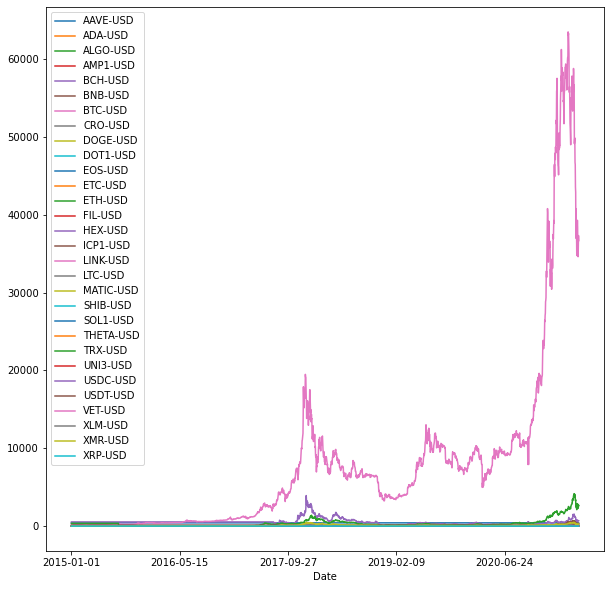

In [64]:
#Plot Stock Prices Data
plt.rcParams["figure.figsize"] = (10,10)
stock_prices.pivot_table(index=stock_prices.index,values=stock_prices.columns).plot()

Unsurprisingly,the purple line that is bitcoin dominates closing price over the years


In [65]:
CCI30.sort_index(inplace=True)

<AxesSubplot:xlabel='Date'>

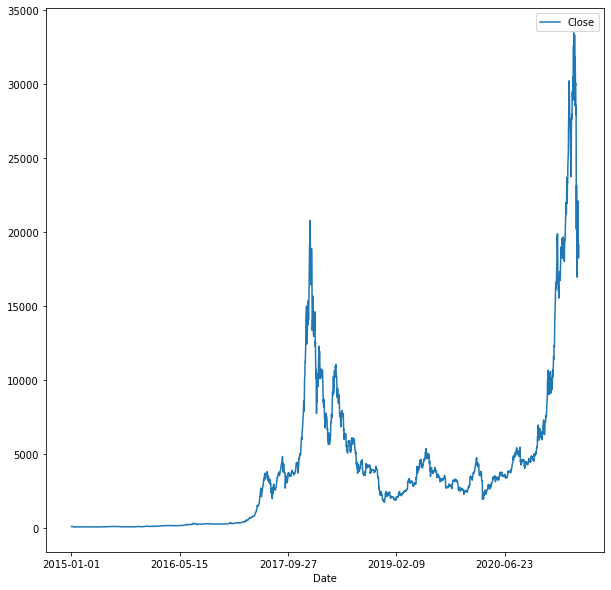

In [66]:
#plot CCI30 data
plt.rcParams["figure.figsize"] = (10,10)
CCI30.plot( y='Close')

This graph looks identical to the Bitcoin line in the stock prices data

We can already see that Bitcoin has a strong relationship to the CCI30 index. Lets now explore how many other stocks help to explain the entire CCi30 index

## PCA Analysis 


In [86]:
stock_scaled = scale(stock_prices)
stock_price_PCA = PCA().fit(stock_scaled)

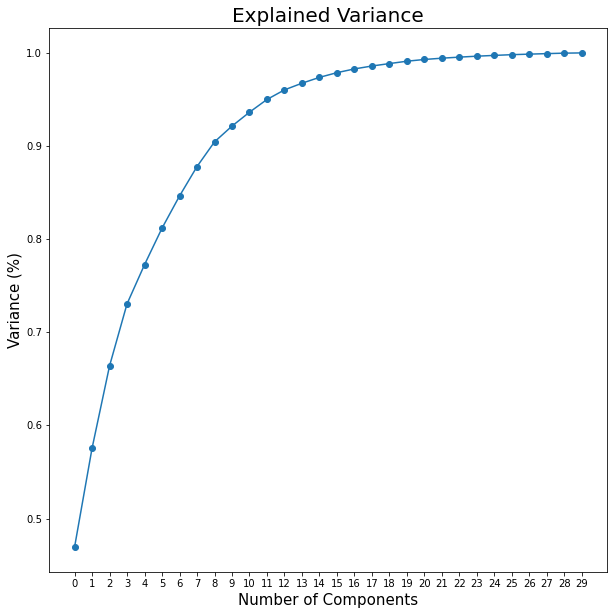

In [87]:
# plot the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(stock_price_PCA.explained_variance_ratio_),marker='o')

# define the labels & title
plt.xlabel('Number of Components', fontsize = 15)
plt.ylabel('Variance (%)', fontsize = 15) 
plt.title('Explained Variance', fontsize = 20)

plt.xticks(np.arange(0,30,1))

# show the plot
plt.show()

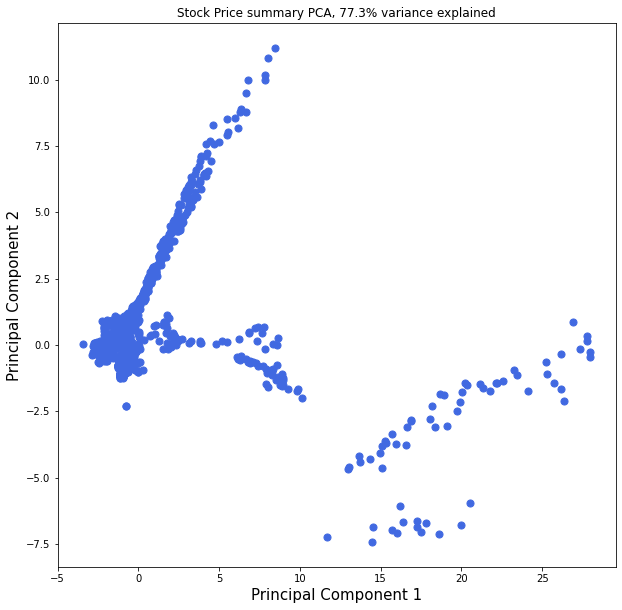

In [100]:
# create a PCA modified dataset
pca_dataset = PCA(n_components=5).fit(stock_scaled).transform(stock_scaled)

# store it in a new data frame
pca_dataset= pd.DataFrame(data = pca_dataset, columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5'])
pc_var = 100 * stock_price_PCA.explained_variance_ratio_.cumsum()[4]
# define a figure
plt.figure()

# define the label and title
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title(f'Stock Price summary PCA, {pc_var:.1f}% variance explained')

# plot the figure
plt.scatter(pca_dataset['principal component 1'], pca_dataset['principal component 2'], c='royalBlue', s = 50)